In [91]:
#Data Cleaning#
import pandas as pd
from datetime import date
data = pd.read_csv("/Users/shuhuisun/Downloads/EC515/time_series_code/n_foreign_visitor_to_Bali_1982_2022_cleaned.csv")
data = data.drop(labels = [12,13], axis = 0)
#data.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data = data.reset_index().melt(id_vars='index', var_name='Year', value_name='Value')
data = data.rename(columns={'index': 'Month'})
month_to_num = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
data['Month_num'] = data['Month'].map(month_to_num)
data = data.sort_values(['Year', 'Month_num'])
data = data.reset_index(drop=True).drop('Month_num', axis=1)
data = data.drop(labels = 335, axis = 0 )
data = data.reset_index(drop=True)
data.to_csv("/Users/shuhuisun/Downloads/EC515/time_series_code/n_foreign_visitor_to_Bali_1982_2008_cleaned.csv", index = False)

In [92]:
#Imports#
data = pd.read_csv("/Users/shuhuisun/Downloads/EC515/time_series_code/n_foreign_visitor_to_Bali_1982_2022_cleaned.csv")
import numpy as np
import math
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.dates import DateFormatter, MonthLocator, YearLocator
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tsa.stattools import acf, q_stat

In [93]:
#cleaning#
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
data['Month_num'] = data['Month'].map(month_to_num)
data["Year"] = data["Year"].astype(int)
DATE = []

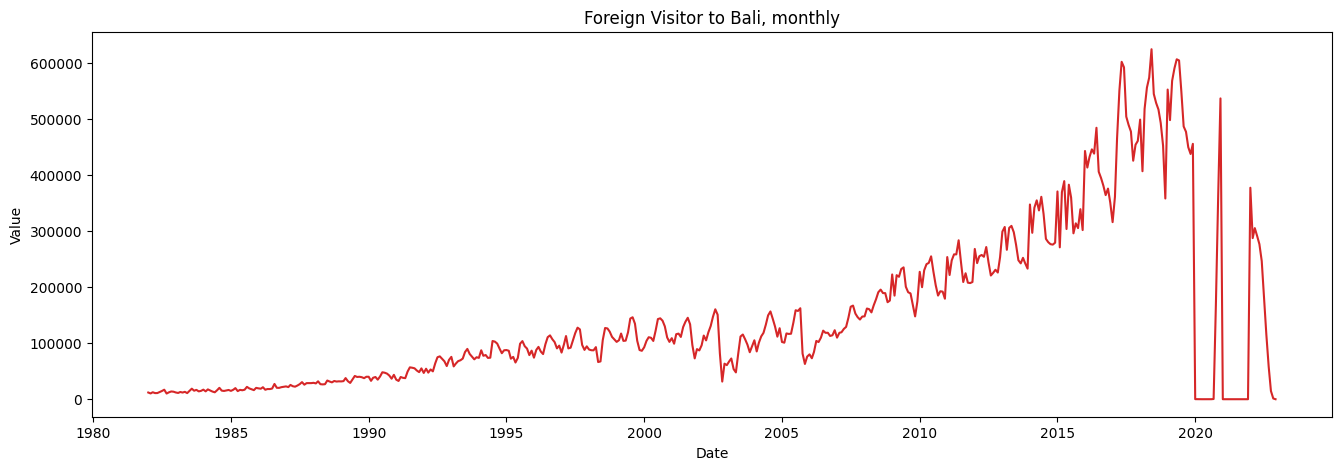

ADF Statistic: -1.9728361266370822
p-value: 0.2986090211875311


In [94]:
for y, m in zip(data.Year, data.Month_num):
    DATE.append(date(y, m, 1))
data['DATE'] = DATE
data = data.reset_index(drop=True).drop('Month_num', axis=1)
plot_df(data, x=data["DATE"], y=data['n_visitor'], title='Foreign Visitor to Bali, monthly')
result = adfuller(data['n_visitor'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
#original series is non-stationary

In [95]:
data

,Month,Year,n_visitor,bombing,DATE
0,January,1982,11961,0,1982-01-01
1,February,1982,10278,0,1982-02-01
2,March,1982,12454,0,1982-03-01
3,April,1982,10946,0,1982-04-01
4,May,1982,10982,0,1982-05-01
...,...,...,...,...,...
487,August,2022,115611,0,2022-08-01
488,September,2022,58335,0,2022-09-01
489,October,2022,14620,0,2022-10-01
490,November,2022,1310,0,2022-11-01


In [96]:
ex = pd.read_csv("/Users/shuhuisun/Downloads/EC515/time_series_code/EXbyYear.csv")
#plot_df(ex, x=ex["Year"], y=ex['EX'], title='Exchange rate to USD, Annually')
ex['diff_EX'] = ex['EX'].diff().fillna(0)

#ex = ex.drop(0)
#plot_df(ex,x=ex['Year'],y=ex['diff_EX'])
print(ex)



    Year            EX      diff_EX
0   1982    661.420750     0.000000
1   1983    909.264833   247.844083
2   1984   1025.944833   116.680000
3   1985   1110.580000    84.635167
4   1986   1282.560000   171.980000
5   1987   1643.848333   361.288333
6   1988   1685.704167    41.855834
7   1989   1770.059167    84.355000
8   1990   1842.813333    72.754166
9   1991   1950.317500   107.504167
10  1992   2029.920833    79.603333
11  1993   2087.103867    57.183034
12  1994   2160.753675    73.649808
13  1995   2248.607975    87.854300
14  1996   2342.296292    93.688317
15  1997   2909.380000   567.083708
16  1998  10013.622500  7104.242500
17  1999   7855.150000 -2158.472500
18  2000   8421.775000   566.625000
19  2001  10260.850000  1839.075000
20  2002   9311.191667  -949.658333
21  2003   8577.133333  -734.058334
22  2004   8938.850000   361.716667
23  2005   9704.741667   765.891667
24  2006   9159.316667  -545.425000
25  2007   9141.000000   -18.316667
26  2008   9698.962500   557

In [97]:
# result = adfuller(ex['diff_EX'], autolag='AIC')
# print(f'ADF Statistic: {result[0]}')
# print(f'p-value: {result[1]}')

In [98]:
# result = adfuller(data['bombing'], autolag='AIC')
# print(f'ADF Statistic: {result[0]}')
# print(f'p-value: {result[1]}')
data['Dbombing'] = 1- (data['bombing']==0)
# result = adfuller(data['Dbombing'], autolag='AIC')
# print(f'ADF Statistic: {result[0]}')
# print(f'p-value: {result[1]}')

#neither bombing nor indicator of bombing is sationary

In [99]:
data = pd.merge(data, ex, on='Year',how='outer')

Critial Values:
   1%, -3.444162847239118
Critial Values:
   5%, -2.8676311169658177
Critial Values:
   10%, -2.5700143303792107


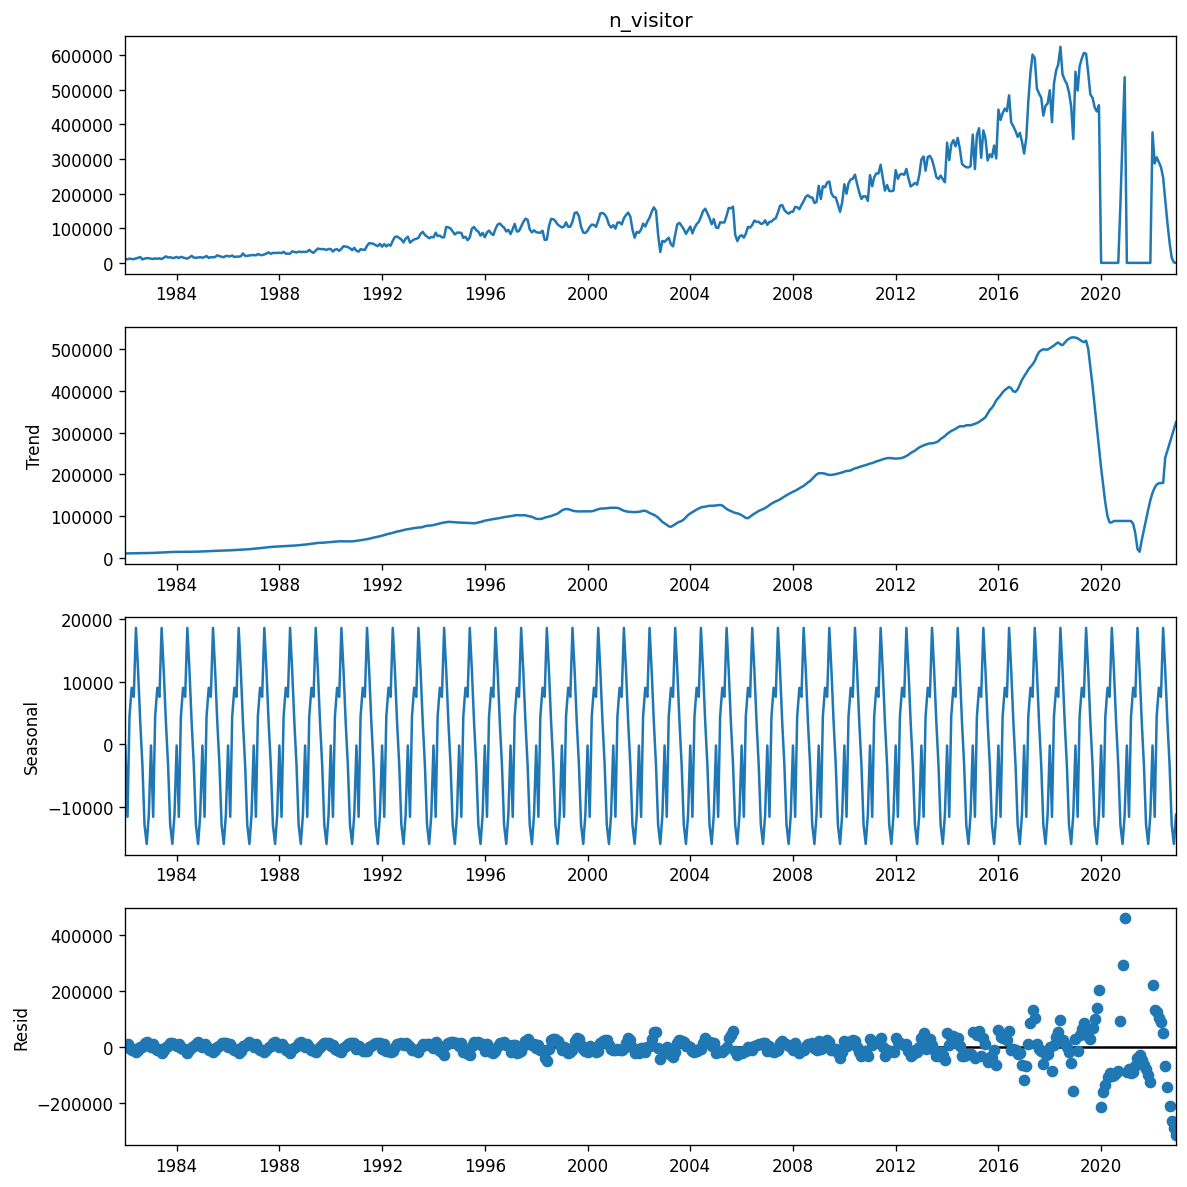

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


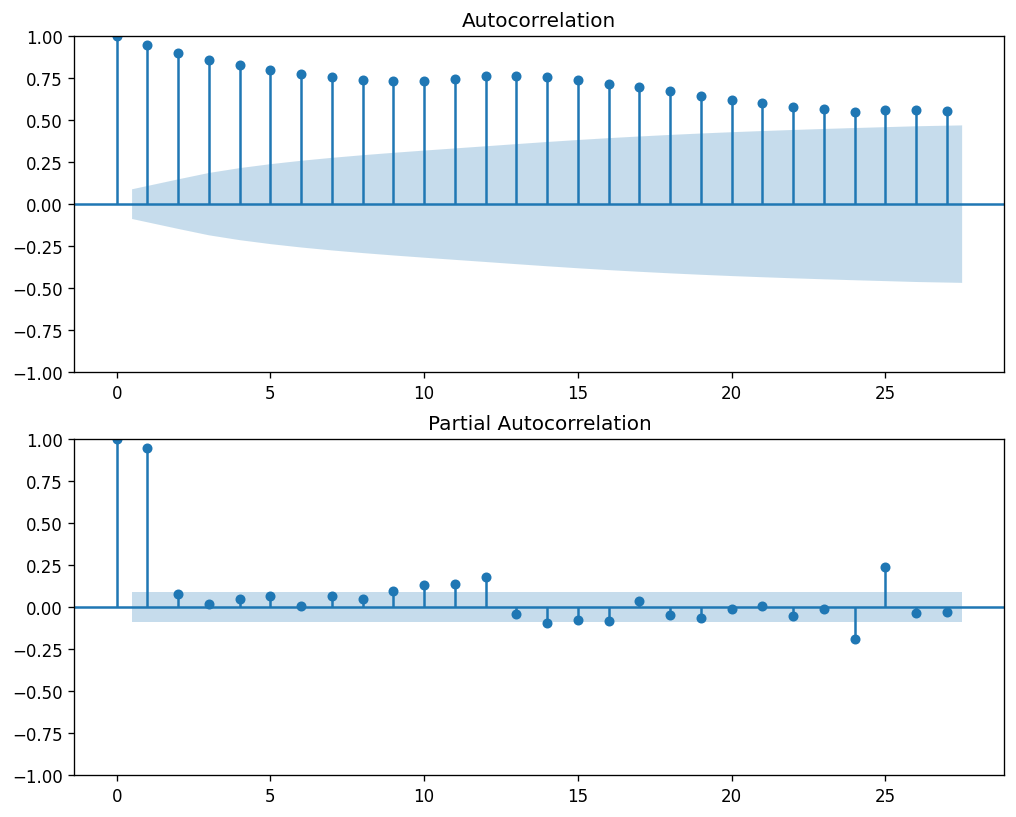

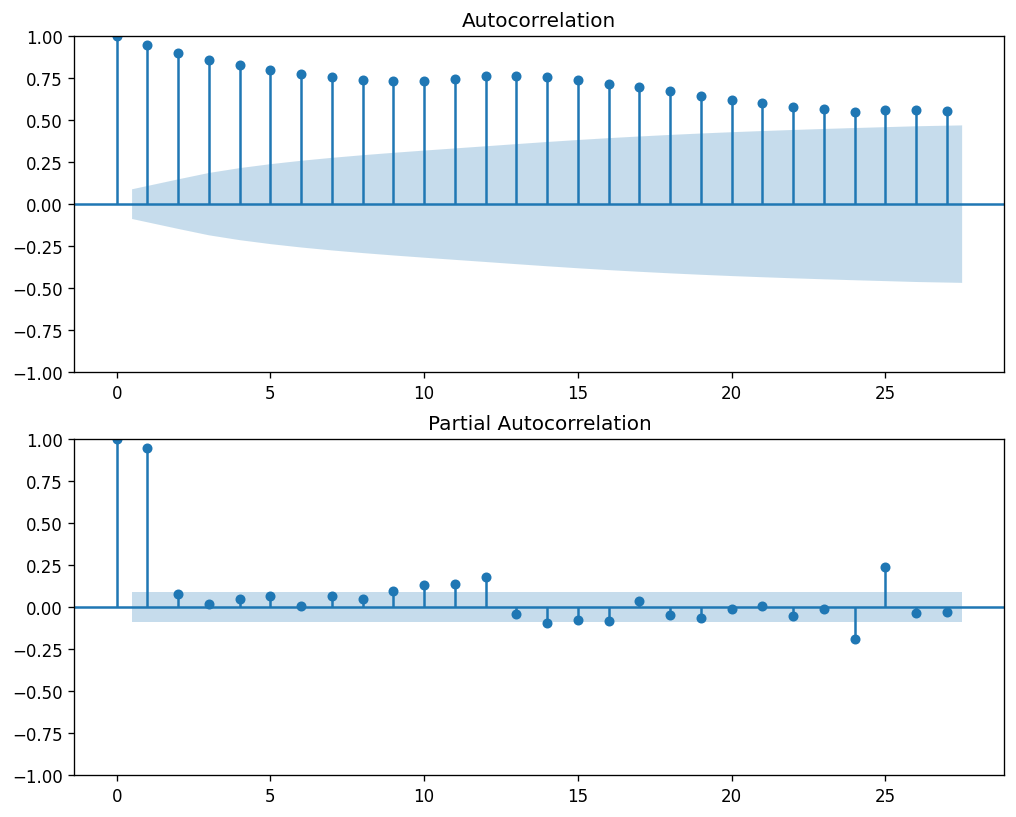

In [100]:
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
data["DATE"] = pd.to_datetime(data['DATE'])
data.index = data['DATE']
result_add = seasonal_decompose(data['n_visitor'], model='additive', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot()#.suptitle('Additive Decompose', fontsize=22)
plt.show()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(data['n_visitor'], ax=ax1)
plot_pacf(data['n_visitor'], ax=ax2)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


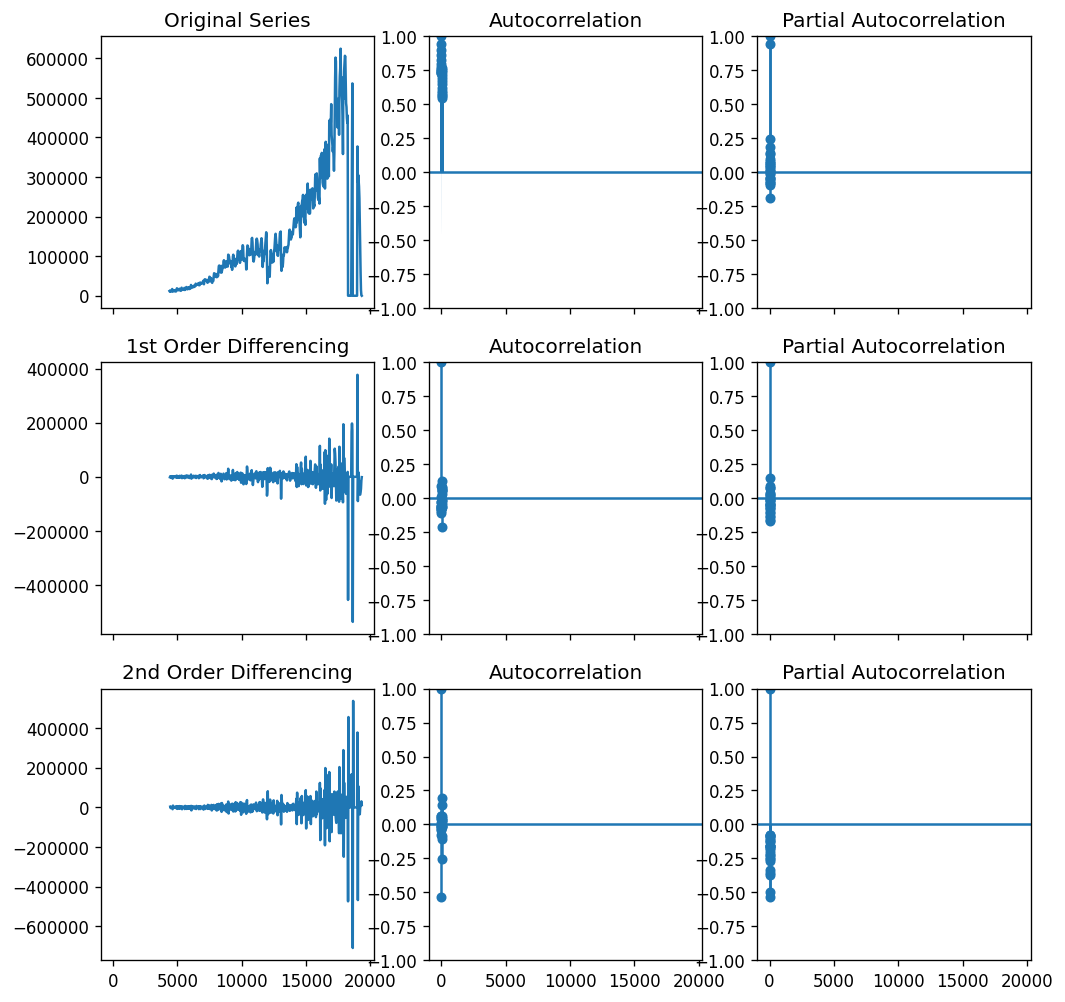

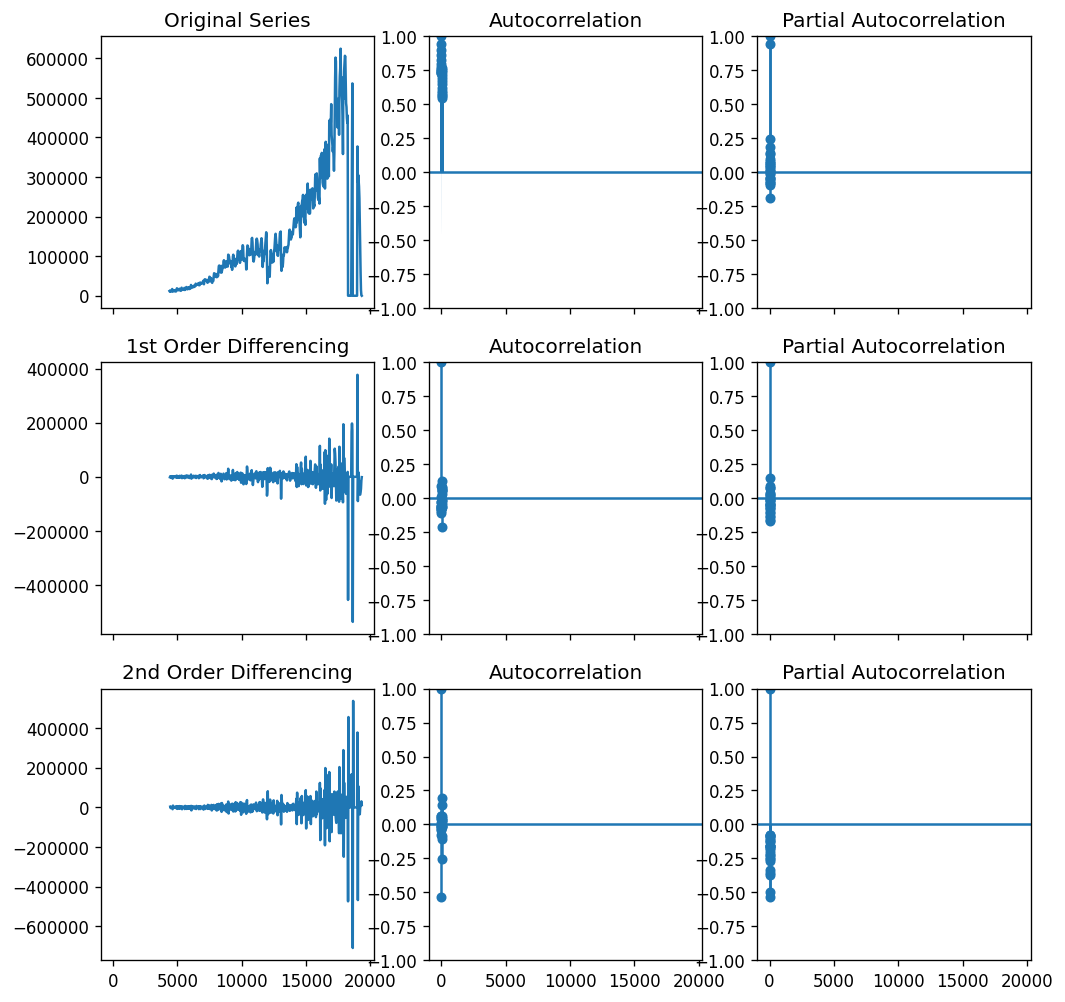

In [101]:
##autocorrelation graph is weird
data['mdate'] = [mdates.date2num(d) for d in data['DATE']]
data.index = data['mdate']
fig, axes = plt.subplots(3, 3, sharex=True)
axes[0, 0].plot(data['n_visitor']); axes[0, 0].set_title('Original Series')
plot_acf(data['n_visitor'], lags = 25, ax=axes[0, 1])
plot_pacf(data['n_visitor'], lags = 25, ax=axes[0,2])
axes[1, 0].plot(data['n_visitor'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data['n_visitor'].diff().dropna(), lags = 25, ax=axes[1, 1])
plot_pacf(data['n_visitor'].diff().dropna(), lags = 25,ax=axes[1,2])
axes[2, 0].plot(data['n_visitor'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data['n_visitor'].diff().diff().dropna(), lags = 25, ax=axes[2, 1])
plot_pacf(data['n_visitor'].diff().diff().dropna(), lags = 25,ax=axes[2,2])



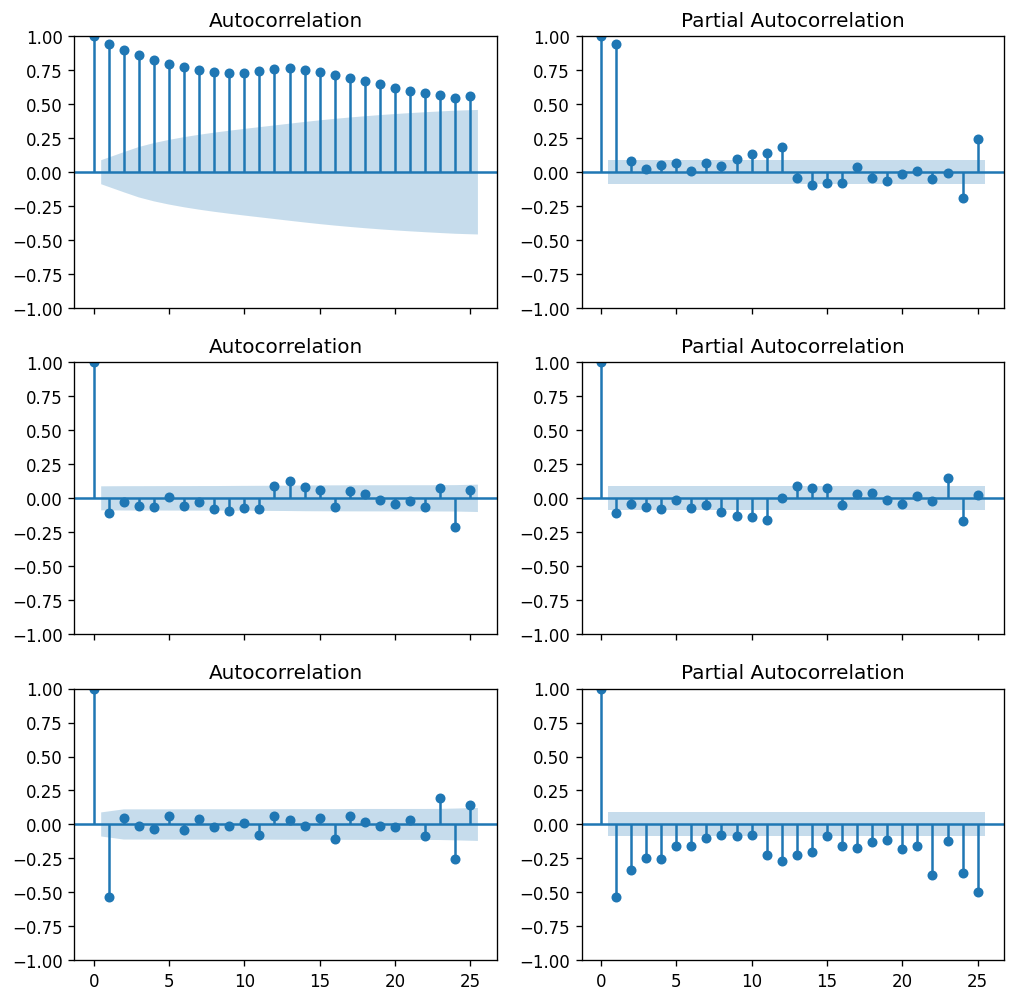

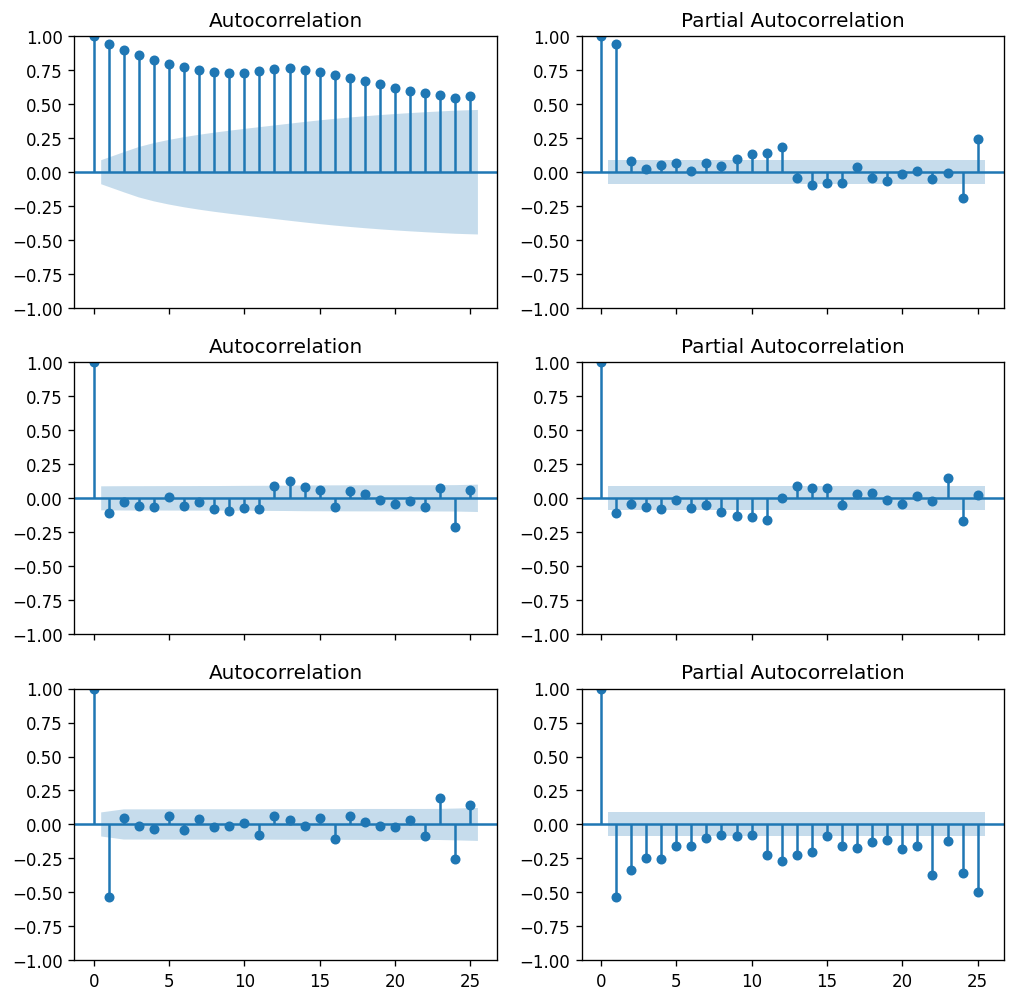

In [102]:
fig, axes = plt.subplots(3, 2, sharex=True)
plot_acf(data['n_visitor'], lags = 25, ax=axes[0, 0])
plot_pacf(data['n_visitor'], lags = 25, ax=axes[0,1])
plot_acf(data['n_visitor'].diff().dropna(), lags = 25, ax=axes[1, 0])
plot_pacf(data['n_visitor'].diff().dropna(), lags = 25,ax=axes[1,1])
plot_acf(data['n_visitor'].diff().diff().dropna(), lags = 25, ax=axes[2, 0])
plot_pacf(data['n_visitor'].diff().diff().dropna(), lags = 25,ax=axes[2,1])

In [103]:
#1st difference
data["diff_n"] = data["n_visitor"].diff().dropna()
data = data.dropna(subset=['diff_n'])
result = adfuller(data['diff_n'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
#1st diff is stationary, but 2020-2022 data are too extreme
data

ADF Statistic: -6.159093795920676
p-value: 7.247045856750251e-08
Critial Values:
   1%, -3.444162847239118
Critial Values:
   5%, -2.8676311169658177
Critial Values:
   10%, -2.5700143303792107


,Month,Year,n_visitor,bombing,DATE,Dbombing,EX,diff_EX,mdate,diff_n
mdate,,,,,,,,,,
4414.0,February,1982,10278,0,1982-02-01,0,661.42075,0.0,4414.0,-1683.0
4442.0,March,1982,12454,0,1982-03-01,0,661.42075,0.0,4442.0,2176.0
4473.0,April,1982,10946,0,1982-04-01,0,661.42075,0.0,4473.0,-1508.0
4503.0,May,1982,10982,0,1982-05-01,0,661.42075,0.0,4503.0,36.0
4534.0,June,1982,12768,0,1982-06-01,0,661.42075,0.0,4534.0,1786.0
...,...,...,...,...,...,...,...,...,...,...
19205.0,August,2022,115611,0,2022-08-01,0,NaN,NaN,19205.0,-66014.0
19236.0,September,2022,58335,0,2022-09-01,0,NaN,NaN,19236.0,-57276.0
19266.0,October,2022,14620,0,2022-10-01,0,NaN,NaN,19266.0,-43715.0


In [104]:
# model = ARIMA(data['n_visitor'], order=(1,0,0))
# model_fit = model.fit()
# print(model_fit.summary())
# model = ARIMA(data['n_visitor'], order=(2,0,0))
# model_fit = model.fit()
# print(model_fit.summary())
# print(model_fit)
# model = ARIMA(data['n_visitor'], order=(0,0,1))
# model_fit = model.fit()
# print(model_fit.summary())
# model = ARIMA(data['n_visitor'], order=(0,0,2))
# model_fit = model.fit()
# print(model_fit.summary())

In [105]:
#1st difference till 2019, not significantly stationary
data19 = data.iloc[0:455,]
print(data19)
#result = adfuller(data19['n_visitor'], autolag='AIC')
result = adfuller(data19['diff_n'], autolag='AIC')
#result = adfuller(data19['diff_n'].diff().dropna(), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
data19

             Month  Year  n_visitor  bombing       DATE  Dbombing  \
mdate                                                               
4414.0    February  1982      10278        0 1982-02-01         0   
4442.0       March  1982      12454        0 1982-03-01         0   
4473.0       April  1982      10946        0 1982-04-01         0   
4503.0         May  1982      10982        0 1982-05-01         0   
4534.0        June  1982      12768        0 1982-06-01         0   
...            ...   ...        ...      ...        ...       ...   
18109.0     August  2019     486602        0 2019-08-01         0   
18140.0  September  2019     477069        0 2019-09-01         0   
18170.0    October  2019     449569        0 2019-10-01         0   
18201.0   November  2019     437456        0 2019-11-01         0   
18231.0   December  2019     455570        0 2019-12-01         0   

                  EX   diff_EX    mdate   diff_n  
mdate                                             


,Month,Year,n_visitor,bombing,DATE,Dbombing,EX,diff_EX,mdate,diff_n
mdate,,,,,,,,,,
4414.0,February,1982,10278,0,1982-02-01,0,661.42075,0.00000,4414.0,-1683.0
4442.0,March,1982,12454,0,1982-03-01,0,661.42075,0.00000,4442.0,2176.0
4473.0,April,1982,10946,0,1982-04-01,0,661.42075,0.00000,4473.0,-1508.0
4503.0,May,1982,10982,0,1982-05-01,0,661.42075,0.00000,4503.0,36.0
4534.0,June,1982,12768,0,1982-06-01,0,661.42075,0.00000,4534.0,1786.0
...,...,...,...,...,...,...,...,...,...,...
18109.0,August,2019,486602,0,2019-08-01,0,14147.67136,-89.26741,18109.0,-62914.0
18140.0,September,2019,477069,0,2019-09-01,0,14147.67136,-89.26741,18140.0,-9533.0
18170.0,October,2019,449569,0,2019-10-01,0,14147.67136,-89.26741,18170.0,-27500.0


/Users/shuhuisun/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


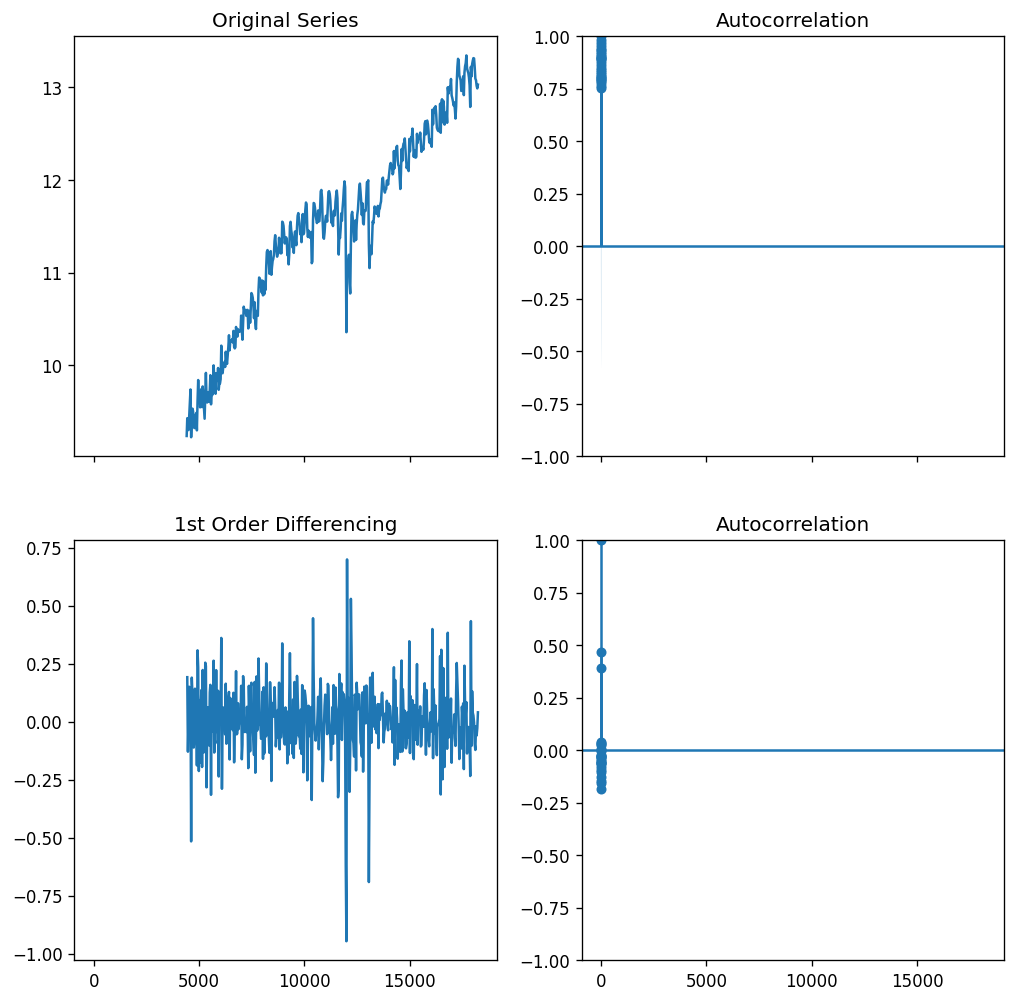

In [106]:
#logged series

data19["log_num"] = np.log(data19["n_visitor"])
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(data19['log_num']); axes[0, 0].set_title('Original Series')
plot_acf(data19['log_num'], ax=axes[0, 1])
axes[1, 0].plot(data19['log_num'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data19['log_num'].diff().dropna(), ax=axes[1, 1])
plt.show()






In [107]:
result = adfuller(data19['log_num'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.288120300341963
p-value: 0.6345896141043195
Critial Values:
   1%, -3.445299682487321
Critial Values:
   5%, -2.8681312035123967
Critial Values:
   10%, -2.570280872933884


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


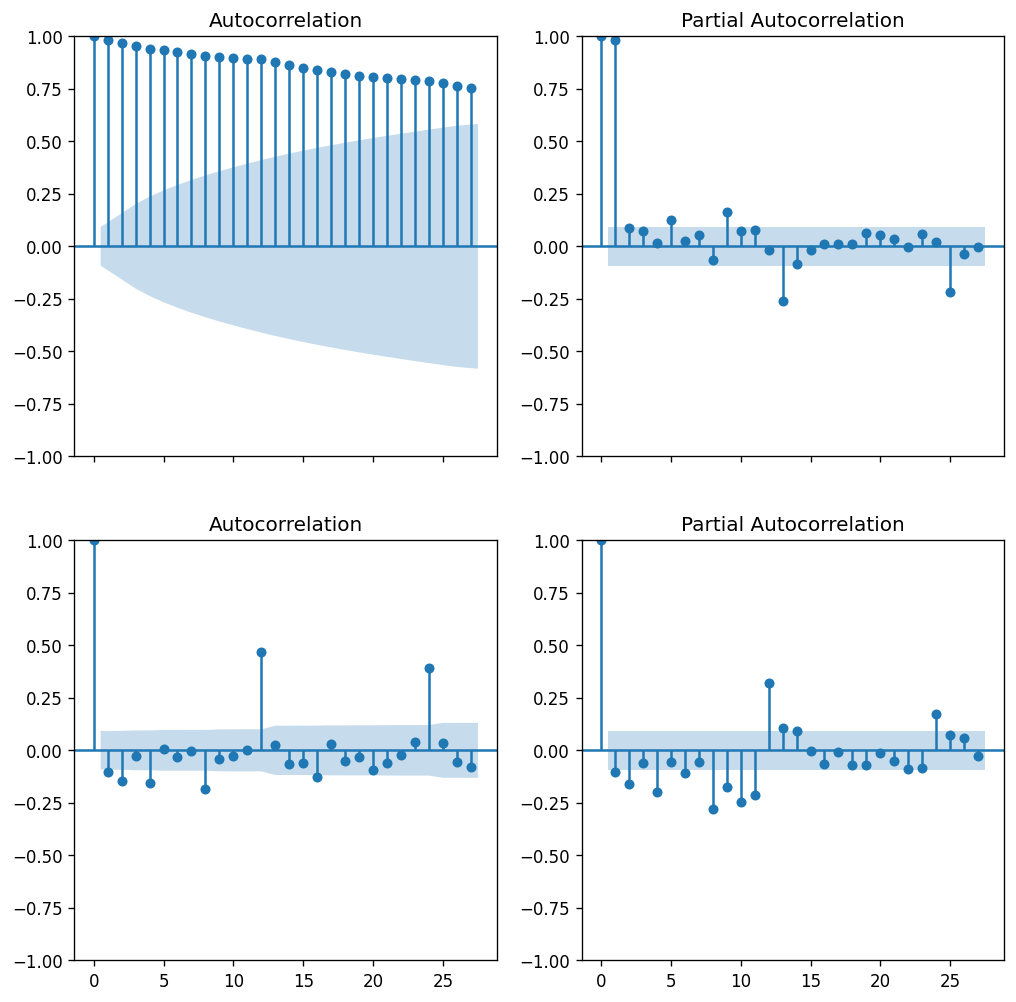

In [108]:

fig, axes = plt.subplots(2, 2, sharex=True)
plot_acf(data19['log_num'], ax=axes[0, 0])
plot_pacf(data19['log_num'], ax=axes[0, 1])
plot_acf(data19['log_num'].diff().dropna(), ax=axes[1, 0])
plot_pacf(data19['log_num'].diff().dropna(), ax=axes[1, 1])
plt.show()

In [109]:
result = adfuller(data19['log_num'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
#fail to reject H0 and conclude that the log number of tourist is non stationary

ADF Statistic: -1.288120300341963
p-value: 0.6345896141043195


In [110]:
data19["diff_log"] = data19['log_num'].diff().dropna()
data19 = data19.iloc[1:456]
print(data19)
#differenced log of series

result = adfuller(data19["diff_log"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

#the differenced log is stationary

             Month  Year  n_visitor  bombing       DATE  Dbombing  \
mdate                                                               
4442.0       March  1982      12454        0 1982-03-01         0   
4473.0       April  1982      10946        0 1982-04-01         0   
4503.0         May  1982      10982        0 1982-05-01         0   
4534.0        June  1982      12768        0 1982-06-01         0   
4564.0        July  1982      14649        0 1982-07-01         0   
...            ...   ...        ...      ...        ...       ...   
18109.0     August  2019     486602        0 2019-08-01         0   
18140.0  September  2019     477069        0 2019-09-01         0   
18170.0    October  2019     449569        0 2019-10-01         0   
18201.0   November  2019     437456        0 2019-11-01         0   
18231.0   December  2019     455570        0 2019-12-01         0   

                  EX   diff_EX    mdate   diff_n    log_num  diff_log  
mdate                         

/Users/shuhuisun/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/Users/shuhuisun/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shuhuisun/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shuhuisun/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

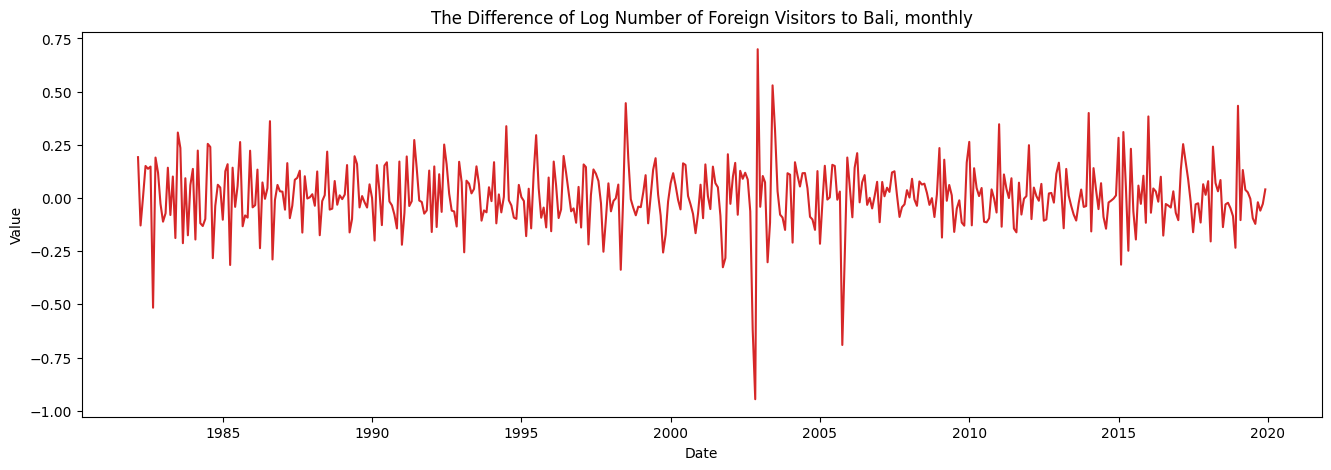

ADF Statistic: -6.107080846311819
p-value: 9.52751461497539e-08
Critial Values:
   1%, -3.445299682487321
Critial Values:
   5%, -2.8681312035123967
Critial Values:
   10%, -2.570280872933884


In [111]:
DATE = []
data19['Month_num'] = data19['Month'].map(month_to_num)
data19["Year"] = data19["Year"].astype(int)
for y, m in zip(data19.Year, data19.Month_num):
    DATE.append(date(y, m, 1))
data19['DATE'] = DATE
data19 = data19.reset_index(drop=True).drop('Month_num', axis=1)
plot_df(data19, x=data19["DATE"], y=data19['diff_log'], title='The Difference of Log Number of Foreign Visitors to Bali, monthly')
result = adfuller(data19['diff_log'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

#The log difference is stationary. 2002 Fluctuation is due to bomb terrorism.

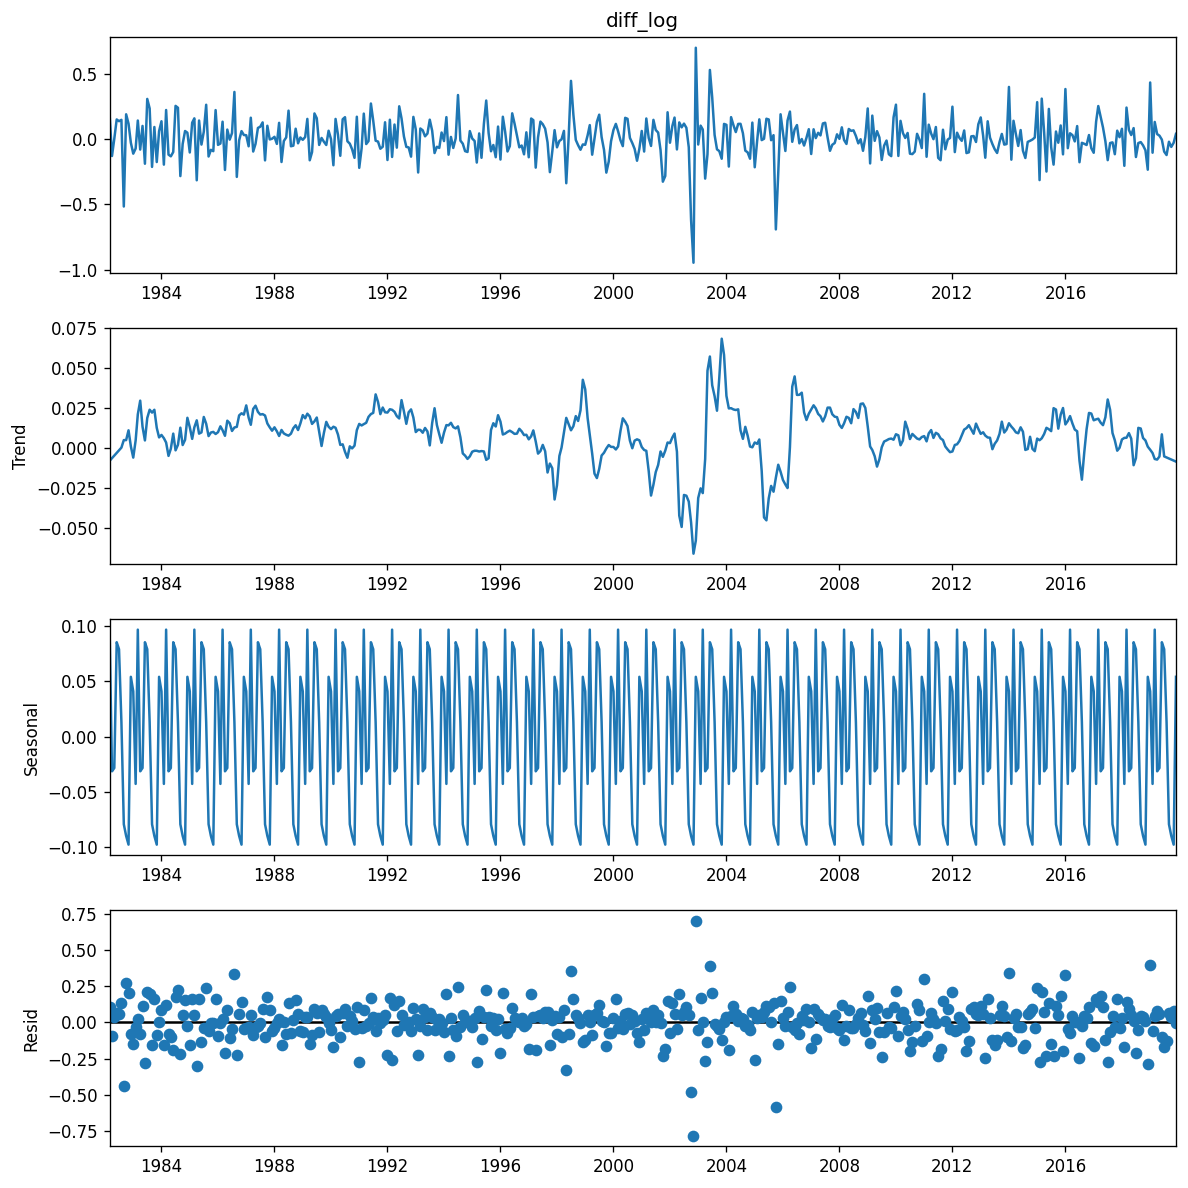

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


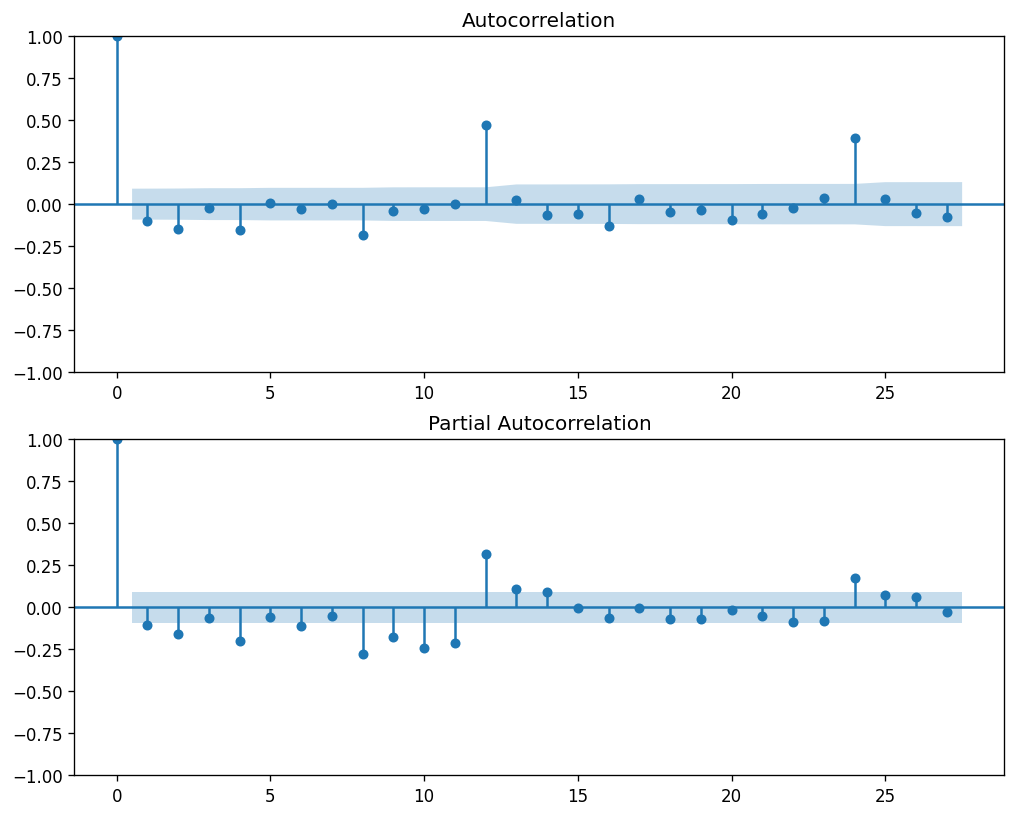

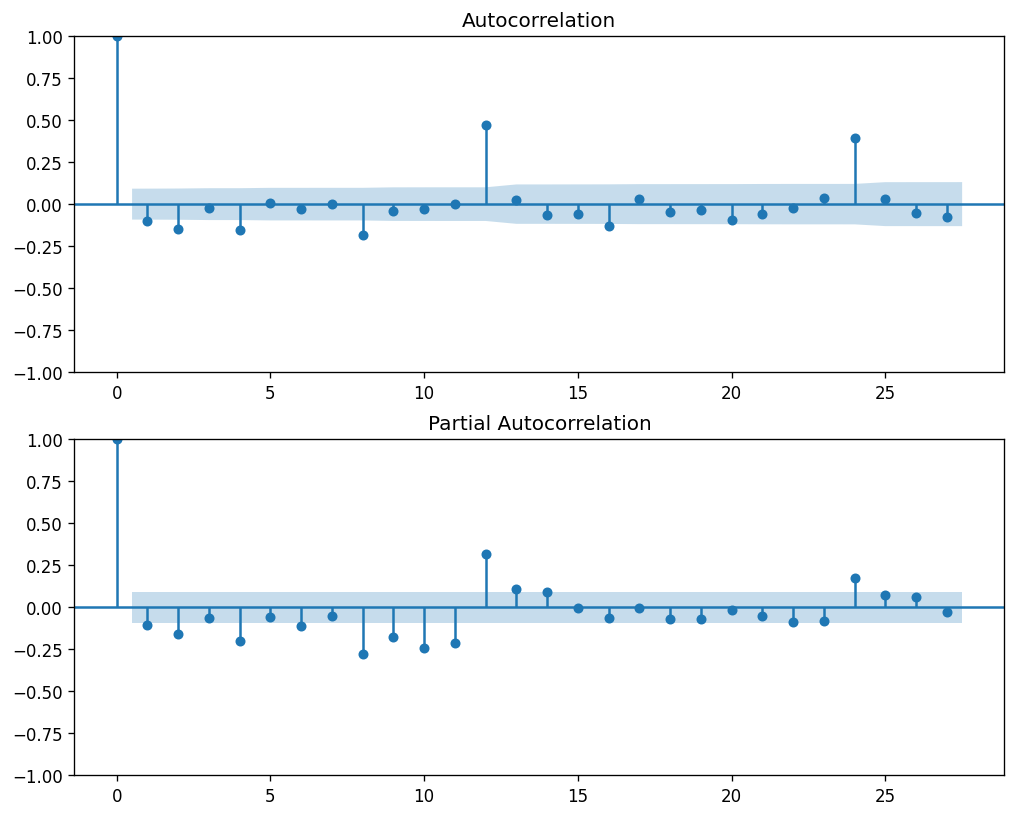

In [112]:
data19["DATE"] = pd.to_datetime(data19['DATE'])
data19.index = data19['DATE']
result_add = seasonal_decompose(data19['diff_log'], model='additive', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot()#.suptitle('Additive Decompose', fontsize=22)
plt.show()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(data19['diff_log'], ax=ax1)
plot_pacf(data19['diff_log'], ax=ax2)

# Trend has been taken care of. There is still seasonality.

In [113]:
#ARIMA Model
model1 = ARIMA(data19['diff_log'], order=(2,0,2))
model1_fit = model1.fit()
print(model1_fit.summary())
print(model1_fit.aic)

model2 = ARIMA(data19['diff_log'], order=(12,0,12))
model2_fit = model2.fit()
print(model2_fit.summary())
print(model2_fit.aic)

# model3 = ARIMA(data19['diff_log'], order=(11,0,12))
# model3_fit = model3.fit()
# print(model3_fit.summary())
# print(model3_fit.aic)

# model4 = ARIMA(data19['diff_log'], order=(12,0,12))
# model4_fit = model4.fit()
# print(model4_fit.summary())
# print(model4_fit.bic)

# model5 = ARIMA(data19['diff_log'], order=(12,0,11))
# model5_fit = model5.fit()
# print(model5_fit.summary())
# print(model5_fit.bic)

# print(model1_fit.bic,model2_fit.bic,model3_fit.bic,model4_fit.bic,model5_fit.bic)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               diff_log   No. Observations:                  454
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 245.266
Date:                Sun, 07 May 2023   AIC                           -478.532
Time:                        13:33:24   BIC                           -453.823
Sample:                    03-01-1982   HQIC                          -468.797
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0084      0.002      4.813      0.000       0.005       0.012
ar.L1         -0.0813      0.149     -0.548      0.584      -0.372       0.210
ar.L2          0.3988      0.131      3.033      0.0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               diff_log   No. Observations:                  454
Model:               ARIMA(12, 0, 12)   Log Likelihood                 335.347
Date:                Sun, 07 May 2023   AIC                           -618.694
Time:                        13:33:26   BIC                           -511.624
Sample:                    03-01-1982   HQIC                          -576.509
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.002      3.627      0.000       0.004       0.013
ar.L1         -0.2652      0.157     -1.686      0.092      -0.573       0.043
ar.L2         -0.3310      0.116     -2.860      0.0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [114]:
# #################run loop over different lag lengths#################
# results_aic = np.zeros((26,26))
# for ar_lag in range(0,26):
#     for ma_lag in range(0,26):
#         model = ARIMA(data19['diff_log'], order=(ar_lag,0,ma_lag))
#         model_fit = model.fit()
#         results_aic[ar_lag,ma_lag] = model_fit.aic
# # determine optimum lag lengths
# plt.imshow(results_aic)
# plt.colorbar()
# plt.show()
# np.min(results_aic)
# a = np.where(results_aic == np.min(results_aic))
# #cmd+k+c/u

In [115]:
#print(a)

In [116]:
#test white's(heteroske) pp(unit root)  Ljung-Box test(autocorrelation)

In [117]:
print(data19)
model2 = ARIMA(data19['diff_log'], order=(12,0,12))
model2_fit = model2.fit()
print(model2_fit.summary())
print(model2_fit.aic)
with open("arima.csv", "w") as f:
    f.write(str(model2_fit))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                Month  Year  n_visitor  bombing       DATE  Dbombing  \
DATE                                                                   
1982-03-01      March  1982      12454        0 1982-03-01         0   
1982-04-01      April  1982      10946        0 1982-04-01         0   
1982-05-01        May  1982      10982        0 1982-05-01         0   
1982-06-01       June  1982      12768        0 1982-06-01         0   
1982-07-01       July  1982      14649        0 1982-07-01         0   
...               ...   ...        ...      ...        ...       ...   
2019-08-01     August  2019     486602        0 2019-08-01         0   
2019-09-01  September  2019     477069        0 2019-09-01         0   
2019-10-01    October  2019     449569        0 2019-10-01         0   
2019-11-01   November  2019     437456        0 2019-11-01         0   
2019-12-01   December  2019     455570        0 2019-12-01         0   

                     EX   diff_EX    mdate   diff_n    log_num 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [118]:
bp_test = het_breuschpagan(model2_fit.resid, model2_fit.model.exog)


print("Breusch-Pagan test:")
print("LM statistic: {:.4f}".format(bp_test[0]))
print("p-value: {:.4f}".format(bp_test[1]))
print("F-statistic: {:.4f}".format(bp_test[2]))
print("F-statistic p-value: {:.4f}\n".format(bp_test[3]))

Breusch-Pagan test:
LM statistic: 0.0000
p-value: nan
F-statistic: nan
F-statistic p-value: nan



In [119]:
model2_fit.resid

DATE
1982-03-01    0.183766
1982-04-01   -0.162739
1982-05-01    0.008428
1982-06-01    0.150496
1982-07-01    0.162756
                ...   
2019-08-01   -0.113857
2019-09-01   -0.004780
2019-10-01   -0.076137
2019-11-01   -0.068641
2019-12-01    0.058710
Length: 454, dtype: float64

In [120]:
data19['mdate']

DATE
1982-03-01     4442.0
1982-04-01     4473.0
1982-05-01     4503.0
1982-06-01     4534.0
1982-07-01     4564.0
               ...   
2019-08-01    18109.0
2019-09-01    18140.0
2019-10-01    18170.0
2019-11-01    18201.0
2019-12-01    18231.0
Name: mdate, Length: 454, dtype: float64

In [121]:
# Compute the sample autocorrelation function
lags = 12
acf_vals, confint = acf(data19['diff_log'], nlags=lags, alpha=0.05)

# Compute the Ljung-Box test statistic and p-value
q_statistic, p_value = q_stat(acf_vals, len(data19))

# Print the results
print(f'Ljung-Box Q({lags}) test statistic: {q_statistic}')
print(f'Ljung-Box Q({lags}) p-value: {p_value}')





Ljung-Box Q(12) test statistic: [457.00662252 461.89243302 471.55075011 471.83928328 483.0515977
 483.07934471 483.5195799  483.51987738 498.96680537 499.77687505
 500.11094511 500.11223631 603.07491704]
Ljung-Box Q(12) p-value: [2.15430148e-101 5.02727396e-101 6.97714914e-102 8.24142918e-101
 3.63230077e-102 3.70848133e-101 2.79535384e-100 2.41209638e-099
 9.56857749e-102 4.92701011e-101 3.03703342e-100 2.09773186e-099
 1.69461381e-120]


In [122]:
data19train = data19.iloc[0:442,]
data19test = data19.iloc[442:454,]
print(data19train)
print(data19test)
model2 = ARIMA(data19train['diff_log'], order=(12,0,12))
model2_fit = model2.fit()
model2_pred = model2_fit.predict(start=442, end=453, dynamic=True)
print(model2_pred)




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                Month  Year  n_visitor  bombing       DATE  Dbombing  \
DATE                                                                   
1982-03-01      March  1982      12454        0 1982-03-01         0   
1982-04-01      April  1982      10946        0 1982-04-01         0   
1982-05-01        May  1982      10982        0 1982-05-01         0   
1982-06-01       June  1982      12768        0 1982-06-01         0   
1982-07-01       July  1982      14649        0 1982-07-01         0   
...               ...   ...        ...      ...        ...       ...   
2018-08-01     August  2018     528512        0 2018-08-01         0   
2018-09-01  September  2018     516777        0 2018-09-01         0   
2018-10-01    October  2018     492678        0 2018-10-01         0   
2018-11-01   November  2018     452423        0 2018-11-01         0   
2018-12-01   December  2018     358065        0 2018-12-01         0   

                     EX    diff_EX    mdate   diff_n    log_num

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [123]:
r_squared = r2_score(data19test['diff_log'].values,model2_pred.values)
r_squared

0.5289936071115244

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


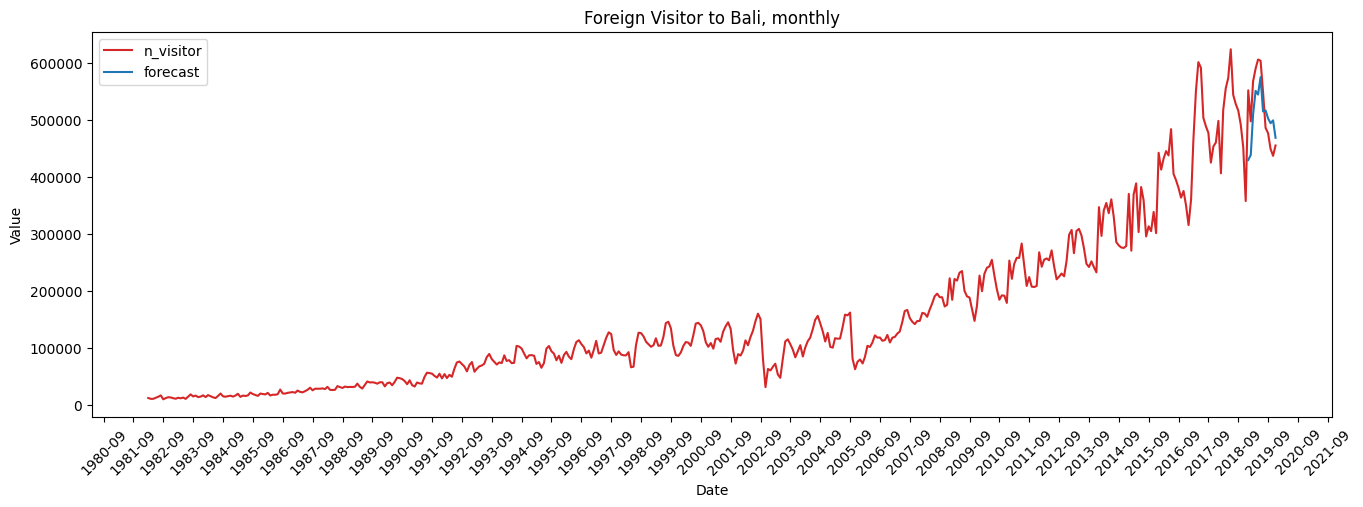

In [124]:
#reverse the difference of log
cumsum = np.cumsum(model2_pred)
log = cumsum + data19.iloc[441,]["log_num"]
log = log.astype("float128")
real = np.exp(log)
data19['forecast'] = np.nan
data19['forecast'].iloc[-12:,] = real.values
data19['mdate'] = [mdates.date2num(d) for d in data19['DATE']]
data19.index = data19['mdate']

def plot_dfs(df, x, y1, y2, title="", xlabel='Date', ylabel='Value', dpi=100, tick_months=6):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, df[y1], color='tab:red', label=y1)
    plt.plot(x, df[y2], color='tab:blue', label=y2)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    date_format = mdates.DateFormatter('%Y-%m')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().xaxis.set_major_locator(MonthLocator(interval=tick_months))
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
data19['mdate'] = [mdates.date2num(d) for d in data19['DATE']]
data19.index = data19['mdate']
plot_dfs(data19, x=data19.index, y1='n_visitor',y2='forecast', title='Foreign Visitor to Bali, monthly', tick_months = 12)

In [125]:
data19


,Month,Year,n_visitor,bombing,DATE,Dbombing,EX,diff_EX,mdate,diff_n,log_num,diff_log,forecast
mdate,,,,,,,,,,,,,
4442.0,March,1982,12454,0,1982-03-01,0,661.42075,0.00000,4442.0,2176.0,9.429797,0.192036,NaN
4473.0,April,1982,10946,0,1982-04-01,0,661.42075,0.00000,4473.0,-1508.0,9.300729,-0.129068,NaN
4503.0,May,1982,10982,0,1982-05-01,0,661.42075,0.00000,4503.0,36.0,9.304013,0.003283,NaN
4534.0,June,1982,12768,0,1982-06-01,0,661.42075,0.00000,4534.0,1786.0,9.454697,0.150684,NaN
4564.0,July,1982,14649,0,1982-07-01,0,661.42075,0.00000,4564.0,1881.0,9.592127,0.137430,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18109.0,August,2019,486602,0,2019-08-01,0,14147.67136,-89.26741,18109.0,-62914.0,13.095202,-0.121591,517101.184330
18140.0,September,2019,477069,0,2019-09-01,0,14147.67136,-89.26741,18140.0,-9533.0,13.075416,-0.019785,502961.842356
18170.0,October,2019,449569,0,2019-10-01,0,14147.67136,-89.26741,18170.0,-27500.0,13.016045,-0.059372,494688.427408


In [126]:
data19['DATE'] = pd.to_datetime(data19['DATE'])
datatest = data19[(data19['DATE'].dt.year == 2019)]
errors = datatest['forecast'] - datatest['n_visitor']
rmse = np.sqrt(mean_squared_error(datatest['n_visitor'], datatest['forecast']))
mae = mean_absolute_error(datatest['n_visitor'], datatest['forecast'])
print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 55409.677128972675
MAE: 48372.29048368294


In [127]:
#try SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data19['diff_log'], order = (3,0,1), seasonal_order=(3,0,1,12))
results = model.fit()
print(results.summary())

with open("sarima.csv", "w") as f:
    f.write(str(results))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.56652D-01    |proj g|=  2.39510D+00


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -7.05574D-01    |proj g|=  5.29796D-01

At iterate   10    f= -7.13672D-01    |proj g|=  9.83393D-02

At iterate   15    f= -7.15145D-01    |proj g|=  8.51813D-03

At iterate   20    f= -7.15230D-01    |proj g|=  5.89455D-02

At iterate   25    f= -7.15337D-01    |proj g|=  3.81680D-02

At iterate   30    f= -7.18243D-01    |proj g|=  1.30064D-01

At iterate   35    f= -7.28020D-01    |proj g|=  1.10251D-01

At iterate   40    f= -7.30221D-01    |proj g|=  4.79340D-03

At iterate   45    f= -7.30494D-01    |proj g|=  3.17410D-02


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -7.31512D-01    |proj g|=  7.29152D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     61      1     0     0   7.292D-02  -7.315D-01
  F = -0.73151195083666276     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                           diff_log   No. Observations:                  454
Model:             SARIMAX(3, 0, 1)x(3, 0, 1, 12)   Log Likelihood                 332.106
Date:                            Sun, 07 May 2023   AIC                           -646.2

In [128]:
model3_pred = results.predict(start=442, end=453, dynamic=True)
print(model3_pred)



mdate
17897.0    0.259998
17928.0   -0.052014
17956.0    0.148661
17987.0    0.070604
18017.0    0.001601
18048.0    0.081671
18078.0   -0.105203
18109.0   -0.046912
18140.0   -0.007812
18170.0   -0.035889
18201.0   -0.000348
18231.0   -0.091413
Name: predicted_mean, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


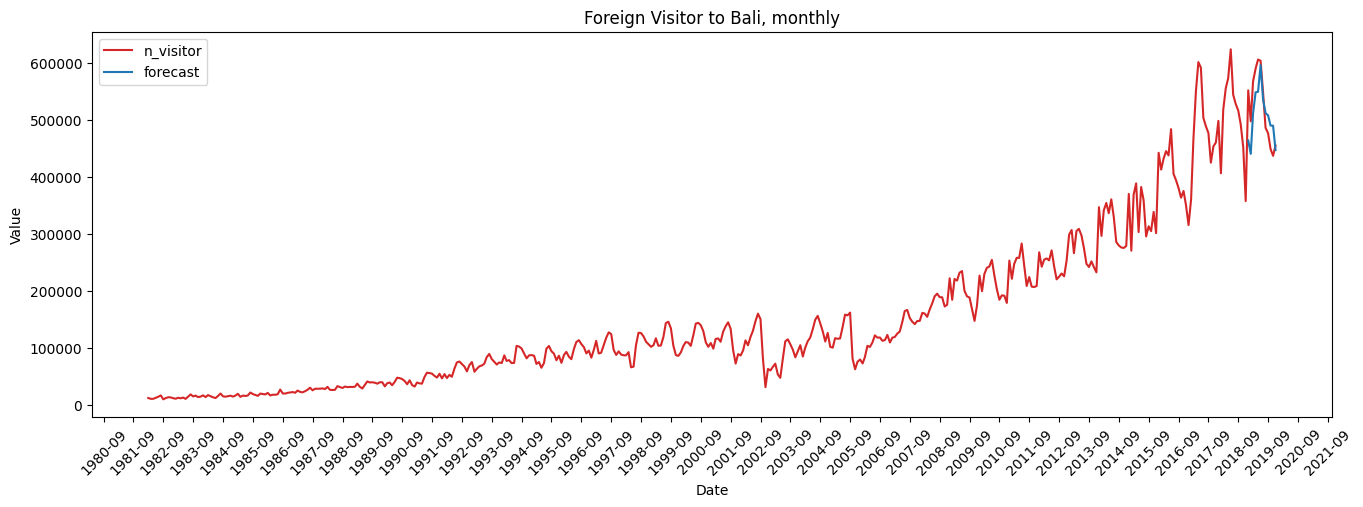

In [129]:
#reverse the difference of log
cumsum = np.cumsum(model3_pred)
log = cumsum + data19.iloc[441,]["log_num"]
log = log.astype("float128")
real = np.exp(log)
data19['forecast'] = np.nan
data19['forecast'].iloc[-12:,] = real.values
data19['mdate'] = [mdates.date2num(d) for d in data19['DATE']]
data19.index = data19['mdate']

def plot_dfs(df, x, y1, y2, title="", xlabel='Date', ylabel='Value', dpi=100, tick_months=6):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, df[y1], color='tab:red', label=y1)
    plt.plot(x, df[y2], color='tab:blue', label=y2)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    date_format = mdates.DateFormatter('%Y-%m')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().xaxis.set_major_locator(MonthLocator(interval=tick_months))
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
data19['mdate'] = [mdates.date2num(d) for d in data19['DATE']]
data19.index = data19['mdate']
plot_dfs(data19, x=data19.index, y1='n_visitor',y2='forecast', title='Foreign Visitor to Bali, monthly', tick_months = 12)

In [130]:
data19['DATE'] = pd.to_datetime(data19['DATE'])
datatest = data19[(data19['DATE'].dt.year == 2019)]
errors = datatest['forecast'] - datatest['n_visitor']
rmse = np.sqrt(mean_squared_error(datatest['n_visitor'], datatest['forecast']))
mae = mean_absolute_error(datatest['n_visitor'], datatest['forecast'])
print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 46113.53996936548
MAE: 39907.96712179114


In [131]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen

##PART 02.01: Granger causality
maxlag=5
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table
    are the P-Values. P-Values lesser than the significance level (0.05), implies
    the Null Hypothesis that the coefficients of the corresponding past values is
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df10 = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df10.columns:
        for r in df10.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df10.loc[r, c] = min_p_value
    df10.columns = [var + '_x' for var in variables]
    df10.index = [var + '_y' for var in variables]
    return df10


In [158]:
data19var = data19.iloc[10:453]
data19gc = data19var[['diff_log','bombing','diff_EX']]

print(data19gc)

         diff_log  bombing     diff_EX
mdate                                 
4748.0  -0.111182        0  247.844083
4779.0  -0.071705        0  247.844083
4807.0   0.142493        0  247.844083
4838.0  -0.079810        0  247.844083
4868.0   0.101122        0  247.844083
...           ...      ...         ...
18078.0 -0.095071        0  -89.267410
18109.0 -0.121591        0  -89.267410
18140.0 -0.019785        0  -89.267410
18170.0 -0.059372        0  -89.267410
18201.0 -0.027313        0  -89.267410

[443 rows x 3 columns]


In [159]:
gc_out = grangers_causation_matrix(data19gc, variables = data19gc.columns)
print("\n --------------------Granger causality test results-------------------- \n")
print(gc_out) #test that column var causes row var, null is that column var doesn't cause row variable

'''
CONCLUSION: If all vars appear to be interchangeably causing each other then is a good candidate for VAR modelling.
'''


 --------------------Granger causality test results-------------------- 

            diff_log_x  bombing_x  diff_EX_x
diff_log_y      1.0000     0.0000     0.6067
bombing_y       0.6356     1.0000     0.3420
diff_EX_y       0.8523     0.8288     1.0000


'\nCONCLUSION: If all vars appear to be interchangeably causing each other then is a good candidate for VAR modelling.\n'

In [160]:
data19gc2 = data19var[['diff_log','diff_EX']]

gc_out = grangers_causation_matrix(data19gc2, variables = data19gc2.columns)
print("\n --------------------Granger causality test results-------------------- \n")
print(gc_out)


 --------------------Granger causality test results-------------------- 

            diff_log_x  diff_EX_x
diff_log_y      1.0000     0.6067
diff_EX_y       0.8523     1.0000


In [164]:
##PART 02.02: Testing for cointegration
def cointegration_test(df, alpha=0.05, lags=3):
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,det_order=0,k_ar_diff=lags)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    print(traces)
    print(cvts)
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

print("\n --------------------Cointegration test results-------------------- \n")
cointegration_test(data19gc2, lags=2)

'''
CONCLUSION: Appears to be no cointegration present (by definition as made all series stationary first).
If series were cointegrated may need to use Vector Error Correction Model.
'''



 --------------------Cointegration test results-------------------- 

[195.44147651  25.27416208]
[15.4943  3.8415]
Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
diff_log ::  195.44    > 15.4943   =>   True
diff_EX ::  25.27     > 3.8415    =>   True


'\nCONCLUSION: Appears to be no cointegration present (by definition as made all series stationary first).\nIf series were cointegrated may need to use Vector Error Correction Model.\n'

In [161]:
from statsmodels.tsa.api import VAR
##Select VAR order
print("\n --------------------VAR lag test results-------------------- \n")
model = VAR(data19gc2)
for i in [1,2,3,4,5,6,7,8,9]:
    try:
        result = model.fit(i)
        print('Lag Order =', i)
        print('AIC : ', result.aic)
        print('BIC : ', result.bic)
        print('FPE : ', result.fpe)
        print('HQIC: ', result.hqic, '\n')
    except:
        print("Can't fit more lags due to dataset.")
        break


'''
CONCLUSION: Lag length with minimum AIC is prefered lag length for VAR.
'''



 --------------------VAR lag test results-------------------- 

Lag Order = 1
AIC :  8.969624048538027
BIC :  9.025162191733651
FPE :  7860.64910583658
HQIC:  8.99152983530625 

Lag Order = 2
AIC :  8.965881481729568
BIC :  9.05860358774877
FPE :  7831.297038578427
HQIC:  9.002457047920947 

Lag Order = 3
AIC :  8.980601626101604
BIC :  9.11063536741245
FPE :  7947.45472244612
HQIC:  9.03190006591604 

Lag Order = 4
AIC :  8.95260992217749
BIC :  9.120083702212463
FPE :  7728.123942126471
HQIC:  9.018684638496323 

Lag Order = 5
AIC :  8.959209631027047
BIC :  9.164252589995726
FPE :  7779.370949237691
HQIC:  9.04011433787089 

Lag Order = 6
AIC :  8.957838362631074
BIC :  9.20058038339191
FPE :  7768.819355245866
HQIC:  9.053627087642484 

Lag Order = 7
AIC :  8.962401618879513
BIC :  9.242973332871419
FPE :  7804.501422156075
HQIC:  9.073128705830749 

Lag Order = 8
AIC :  8.88270381439838
BIC :  9.201236607632897
FPE :  7206.822818143755
HQIC:  9.00842392572459 

Lag Order = 9
AIC 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


'\nCONCLUSION: Lag length with minimum AIC is prefered lag length for VAR.\n'

In [162]:
##Train VAR model
print("\n --------------------VAR MODEL-------------------- \n")
model_fitted = model.fit(2)
print(model_fitted.summary())


 --------------------VAR MODEL-------------------- 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 07, May, 2023
Time:                     14:01:30
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    9.05860
Nobs:                     441.000    HQIC:                   9.00246
Log likelihood:          -3218.48    FPE:                    7831.30
AIC:                      8.96588    Det(Omega_mle):         7656.69
--------------------------------------------------------------------
Results for equation diff_log
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.010174         0.007370            1.380           0.167
L1.diff_log        -0.109217         0.047336           -2.307           0.021
L1.diff_EX 

In [166]:
print(data19gc2)

         diff_log     diff_EX
mdate                        
4748.0  -0.111182  247.844083
4779.0  -0.071705  247.844083
4807.0   0.142493  247.844083
4838.0  -0.079810  247.844083
4868.0   0.101122  247.844083
...           ...         ...
18078.0 -0.095071  -89.267410
18109.0 -0.121591  -89.267410
18140.0 -0.019785  -89.267410
18170.0 -0.059372  -89.267410
18201.0 -0.027313  -89.267410

[443 rows x 2 columns]


In [168]:
#evaluate prediction performance
modelvar = model_fitted.predict(start = 431, end=442, dynamic=True)
print(modelvar)


AttributeError: 'VARResults' object has no attribute 'predict'

In [ ]:
#reverse the difference of log
cumsum = np.cumsum(model3_pred)
log = cumsum + data19.iloc[441,]["log_num"]
log = log.astype("float128")
real = np.exp(log)
data19['forecast'] = np.nan
data19['forecast'].iloc[-12:,] = real.values
data19['mdate'] = [mdates.date2num(d) for d in data19['DATE']]
data19.index = data19['mdate']

def plot_dfs(df, x, y1, y2, title="", xlabel='Date', ylabel='Value', dpi=100, tick_months=6):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, df[y1], color='tab:red', label=y1)
    plt.plot(x, df[y2], color='tab:blue', label=y2)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    date_format = mdates.DateFormatter('%Y-%m')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().xaxis.set_major_locator(MonthLocator(interval=tick_months))
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
data19['mdate'] = [mdates.date2num(d) for d in data19['DATE']]
data19.index = data19['mdate']
plot_dfs(data19, x=data19.index, y1='n_visitor',y2='forecast', title='Foreign Visitor to Bali, monthly', tick_months = 12)

data19['DATE'] = pd.to_datetime(data19['DATE'])
datatest = data19[(data19['DATE'].dt.year == 2019)]
errors = datatest['forecast'] - datatest['n_visitor']
rmse = np.sqrt(mean_squared_error(datatest['n_visitor'], datatest['forecast']))
mae = mean_absolute_error(datatest['n_visitor'], datatest['forecast'])
print("RMSE:", rmse)
print("MAE:", mae)